### Anomaly Detection & Time Series | Assignment
Practical Questions: Question 6 to Question 10

**Dataset:**
- [NYC Taxi Fare Data](https://drive.google.com/file/d/1NgjnaMX_41yLiutbeM4Dpv6yQdDf82zm/view?usp=sharing)
- [AirPassengers Dataset](https://drive.google.com/file/d/1eu6DQtqaH2qmJZU_RU5tQe5hhYejjXW3/view?usp=sharing)

 **Question 6:** Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

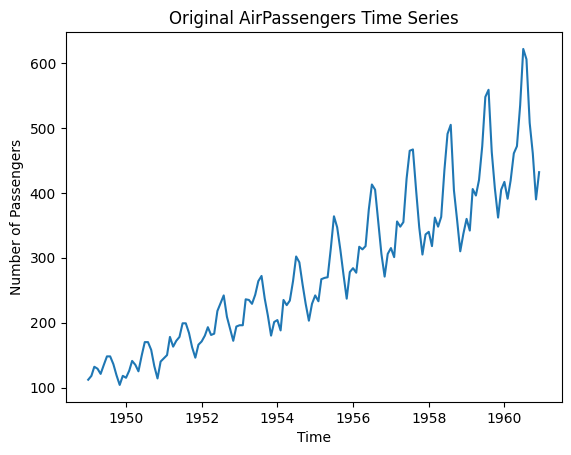

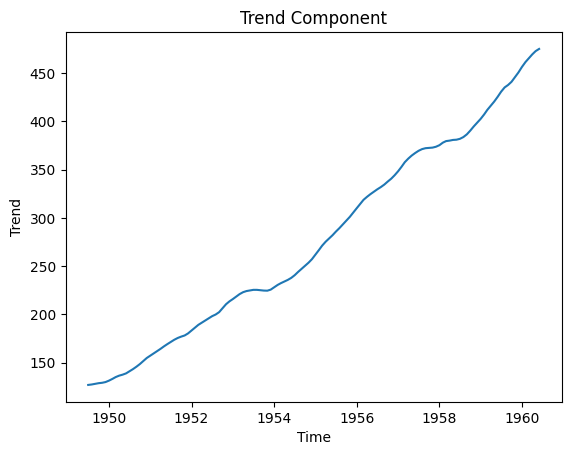

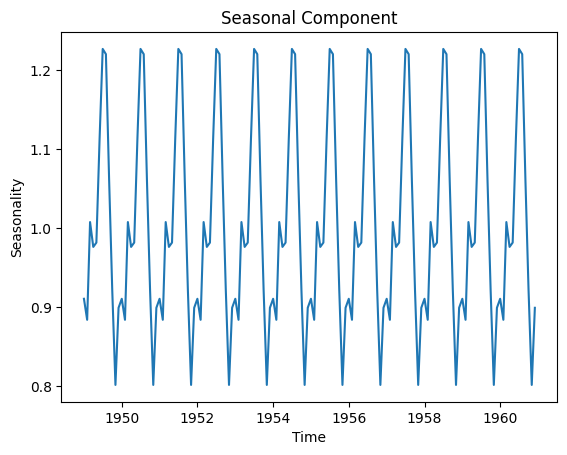

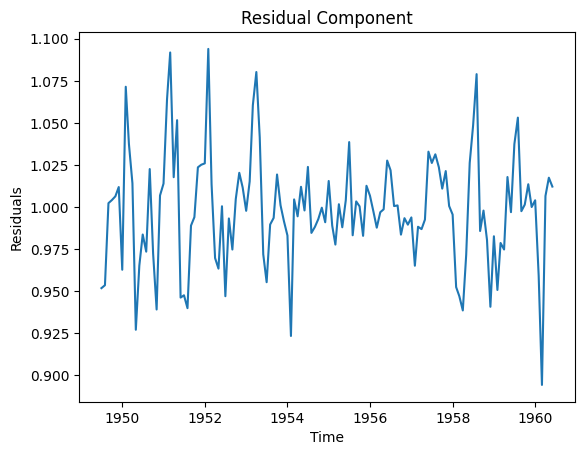

In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset
file_path = "/content/AirPassengers.csv"
df = pd.read_csv(file_path)

# Convert 'Month' column to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Extract the time series
ts = df['#Passengers']

# Plot the original time series
plt.figure()
plt.plot(ts)
plt.title("Original AirPassengers Time Series")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)

# Plot Trend component
plt.figure()
plt.plot(decomposition.trend)
plt.title("Trend Component")
plt.xlabel("Time")
plt.ylabel("Trend")
plt.show()

# Plot Seasonal component
plt.figure()
plt.plot(decomposition.seasonal)
plt.title("Seasonal Component")
plt.xlabel("Time")
plt.ylabel("Seasonality")
plt.show()

# Plot Residual component
plt.figure()
plt.plot(decomposition.resid)
plt.title("Residual Component")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()


Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03                1   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04                1   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52                1   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14                1   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2           1                  N           238           239   
1            1.2           1                  N           239           238   
2            0.6           1                  N           238           238   
3            0.8           1                  N           238           151   
4            0.0           1                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


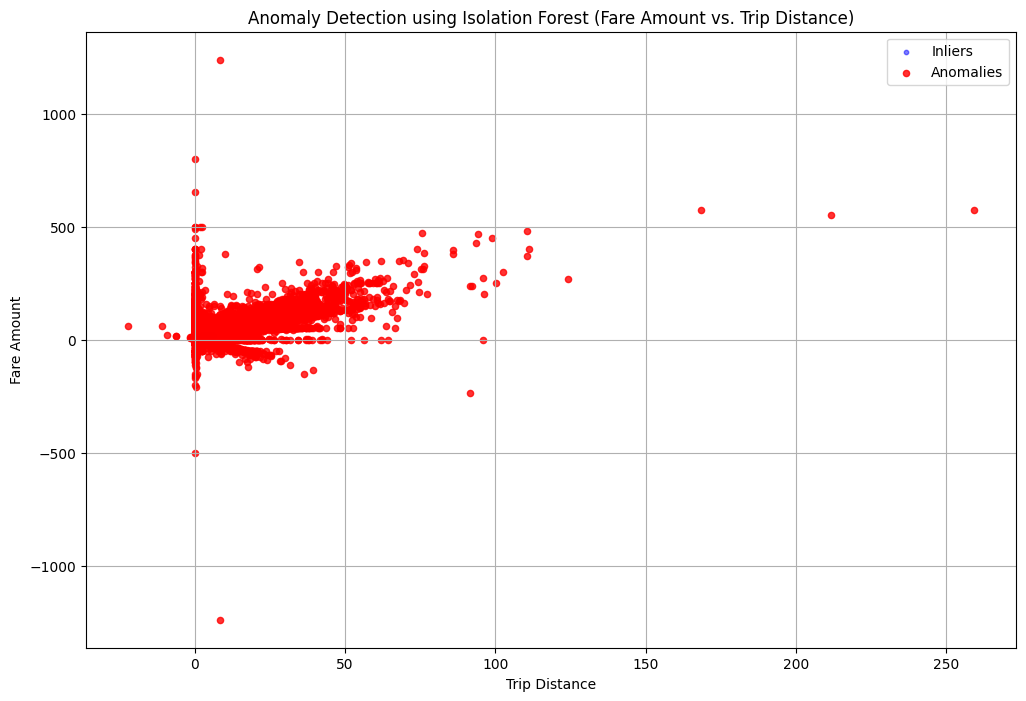

Anomaly visualization complete.


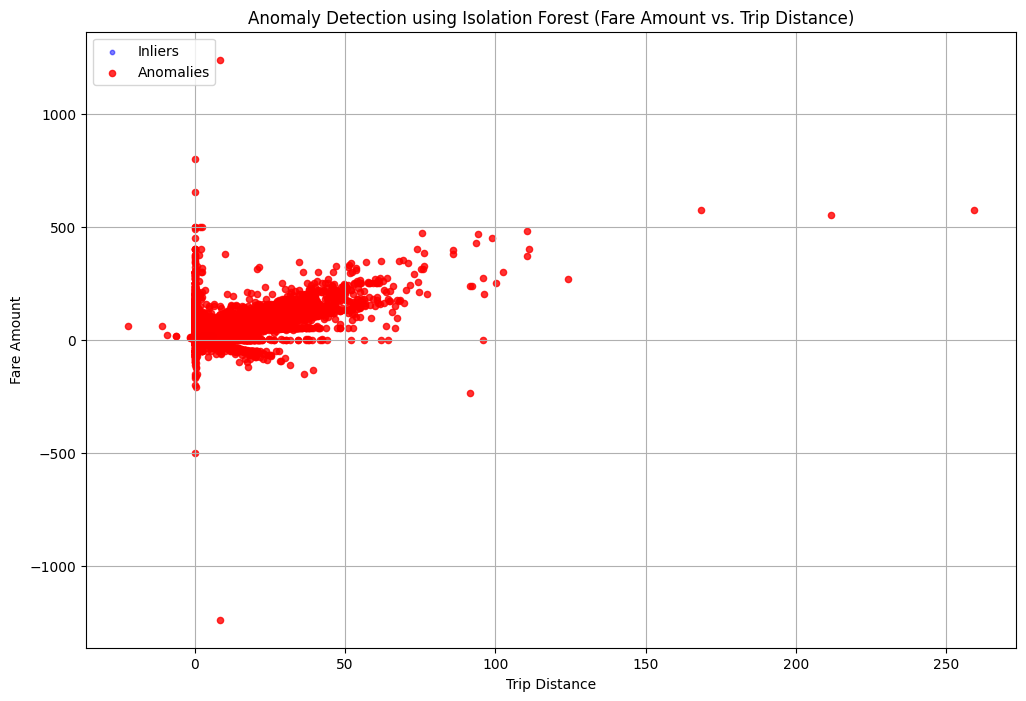

Anomaly visualization complete.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the NYC Taxi Fare dataset
file_path = "/content/NYC_taxi_fare_data.csv"
taxi_df = pd.read_csv(file_path)

# Display the first few rows and check data types
print(taxi_df.head())
print(taxi_df.info())

features = ['fare_amount', 'trip_distance']
X = taxi_df[features]

print(X.head())
print(X.info())

print("Missing values before handling:\n", X.isnull().sum())

from sklearn.ensemble import IsolationForest

# Instantiate Isolation Forest model
# Contamination is set to 'auto' to let the algorithm estimate it,
# or you can specify a value (e.g., 0.01 for 1% anomalies).
# random_state ensures reproducibility.
model = IsolationForest(random_state=42)

# Fit the model to the data
model.fit(X)

print("Isolation Forest model initialized and fitted successfully.")

# Predict anomaly labels (-1 for anomalies, 1 for inliers)
anomaly_labels = model.predict(X)
taxi_df['anomaly_label'] = anomaly_labels

# Get anomaly scores (lower scores indicate more anomalous)
anomaly_scores = model.decision_function(X)
taxi_df['anomaly_score'] = anomaly_scores

# Display the head of the DataFrame with new columns
print(taxi_df[['fare_amount', 'trip_distance', 'anomaly_label', 'anomaly_score']].head())
print(f"Number of anomalies detected (label -1): {np.sum(anomaly_labels == -1)}")

# Separate inliers and anomalies for plotting
anomalies = taxi_df[taxi_df['anomaly_label'] == -1]
inliers = taxi_df[taxi_df['anomaly_label'] == 1]

# Sample a subset of inliers if the dataset is too large, for better visualization
# For example, sample 100000 inliers if there are many
if len(inliers) > 100000:
    inliers_sampled = inliers.sample(n=100000, random_state=42)
else:
    inliers_sampled = inliers

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(inliers_sampled['trip_distance'], inliers_sampled['fare_amount'],
            color='blue', s=10, label='Inliers', alpha=0.5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            color='red', s=20, label='Anomalies', alpha=0.8)

plt.title('Anomaly Detection using Isolation Forest (Fare Amount vs. Trip Distance)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend()
plt.grid(True)
plt.show()

print("Anomaly visualization complete.")

# Separate inliers and anomalies for plotting
anomalies = taxi_df[taxi_df['anomaly_label'] == -1]
inliers = taxi_df[taxi_df['anomaly_label'] == 1]

# Sample a subset of inliers if the dataset is too large, for better visualization
# For example, sample 100000 inliers if there are many
if len(inliers) > 100000:
    inliers_sampled = inliers.sample(n=100000, random_state=42)
else:
    inliers_sampled = inliers

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(inliers_sampled['trip_distance'], inliers_sampled['fare_amount'],
            color='blue', s=10, label='Inliers', alpha=0.5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            color='red', s=20, label='Anomalies', alpha=0.8)

plt.title('Anomaly Detection using Isolation Forest (Fare Amount vs. Trip Distance)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(loc='upper left') # Explicitly set legend location to avoid 'best' warning
plt.grid(True)
plt.show()

print("Anomaly visualization complete.")

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

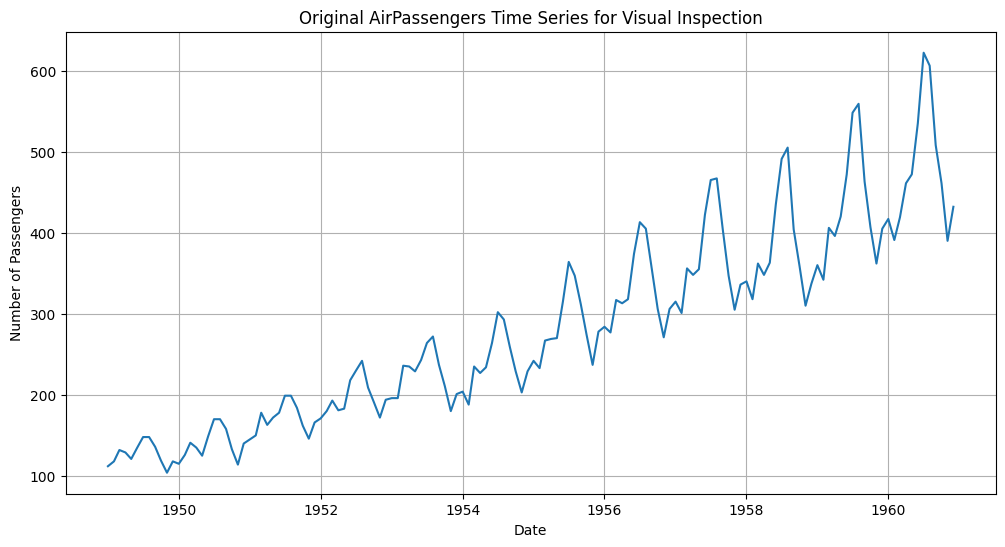

Visual inspection of the time series is complete. Observe for trend and seasonality.
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is likely non-stationary (fail to reject H0).
Augmented Dickey-Fuller test for stationarity complete.


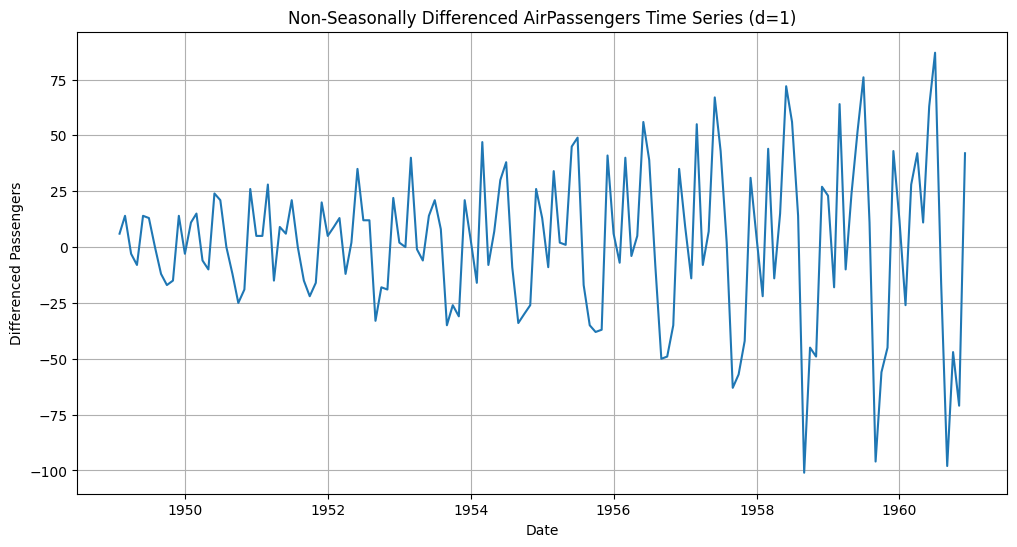

ADF Statistic (Differenced): -2.829267
p-value (Differenced): 0.054213
Critical Values (Differenced):
	1%: -3.482
	5%: -2.884
	10%: -2.579
The differenced time series is likely non-stationary (fail to reject H0).
Non-seasonal differencing and re-checking stationarity complete.


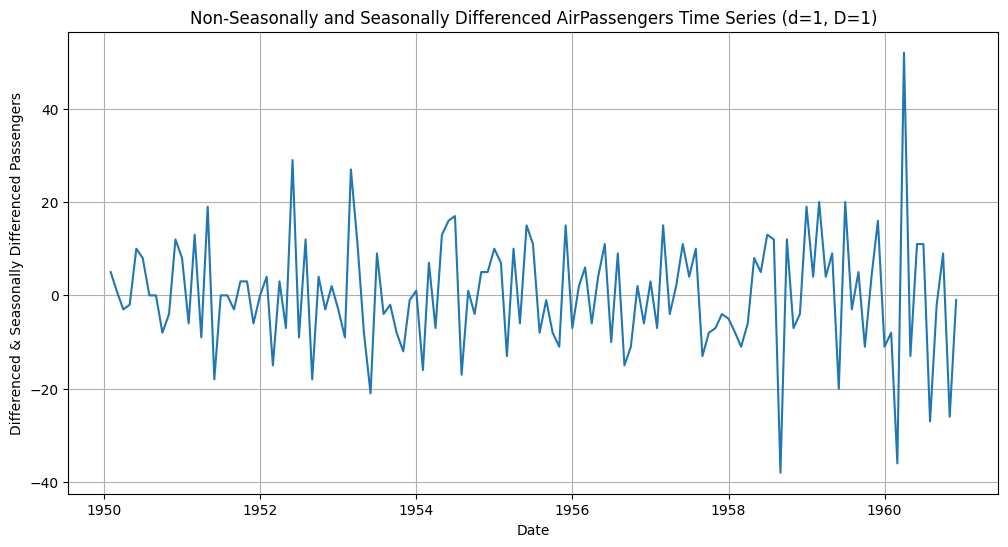

ADF Statistic (Differenced & Seasonally Differenced): -15.595618
p-value (Differenced & Seasonally Differenced): 0.000000
Critical Values (Differenced & Seasonally Differenced):
	1%: -3.482
	5%: -2.884
	10%: -2.579
The differenced and seasonally differenced time series is likely stationary (reject H0).
Seasonal differencing and re-checking stationarity complete.


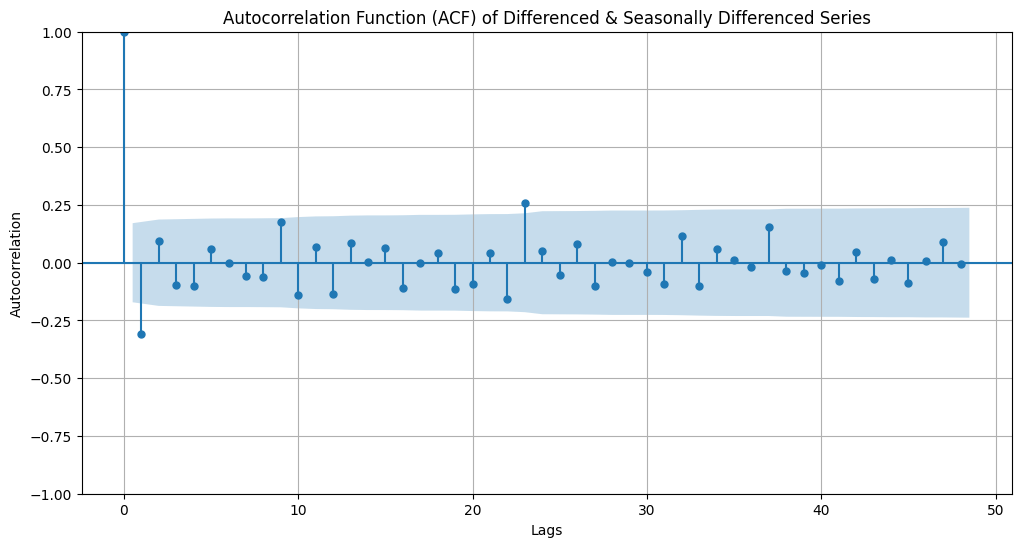

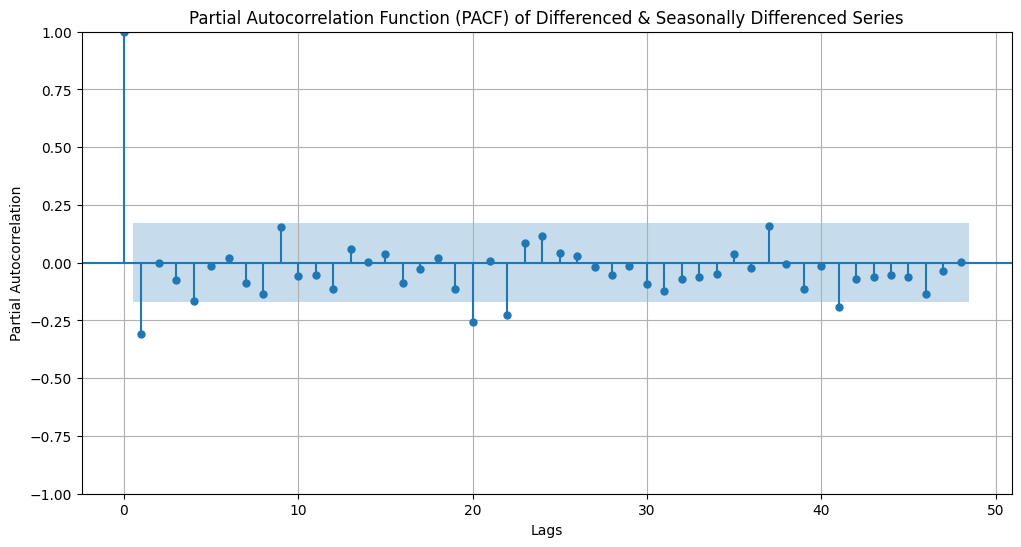

ACF and PACF plots for the differenced and seasonally differenced series are displayed. Analyze these plots to determine p, q, P, and Q.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Fri, 02 Jan 2026   AIC                            922.205
Time:                                    12:08:35   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

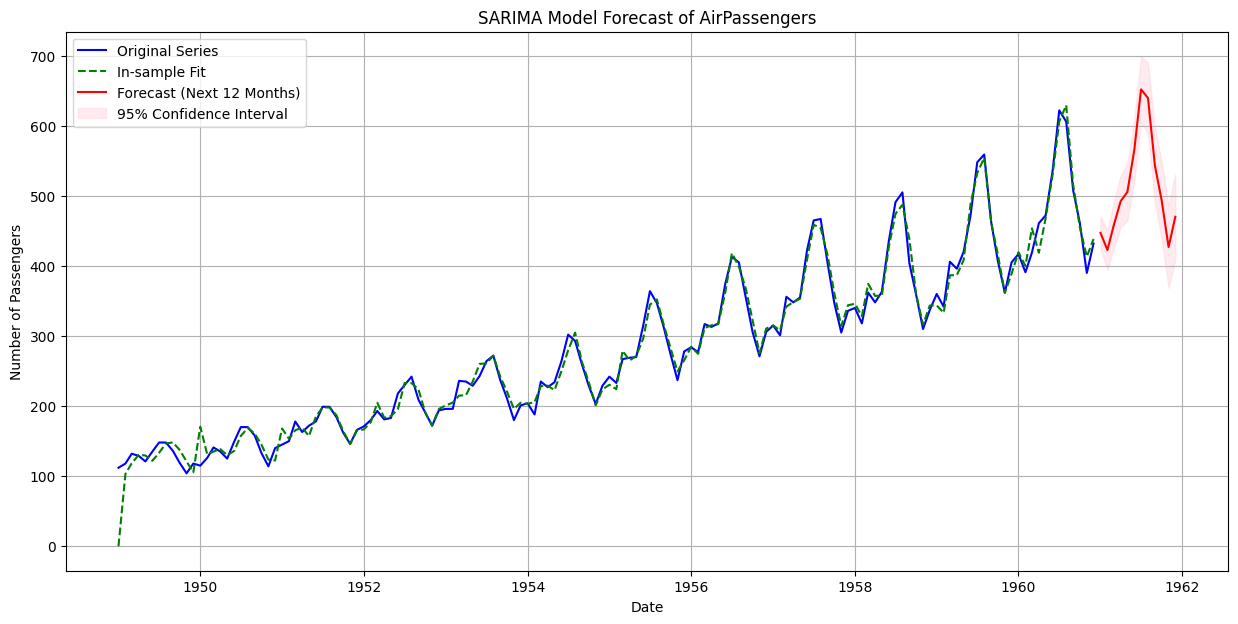

SARIMA model forecasting and visualization complete for the next 12 months.


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot the original time series again for visual inspection
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Original AirPassengers Time Series for Visual Inspection')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

print("Visual inspection of the time series is complete. Observe for trend and seasonality.")

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ts)

# Print the results of the ADF test
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the p-value
if result[1] <= 0.05:
    print("The time series is likely stationary (reject H0).")
else:
    print("The time series is likely non-stationary (fail to reject H0).")

print("Augmented Dickey-Fuller test for stationarity complete.")


# Apply first-order non-seasonal differencing (d=1)
diff_ts = ts.diff().dropna()

# Plot the differenced time series for visual inspection
plt.figure(figsize=(12, 6))
plt.plot(diff_ts)
plt.title('Non-Seasonally Differenced AirPassengers Time Series (d=1)')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(diff_ts)

# Print the results of the ADF test for the differenced series
print('ADF Statistic (Differenced): %f' % result_diff[0])
print('p-value (Differenced): %f' % result_diff[1])
print('Critical Values (Differenced):')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the p-value for the differenced series
if result_diff[1] <= 0.05:
    print("The differenced time series is likely stationary (reject H0).")
else:
    print("The differenced time series is likely non-stationary (fail to reject H0).")

print("Non-seasonal differencing and re-checking stationarity complete.")

# Apply seasonal differencing (period=12, D=1) to the non-seasonally differenced series
diff_seasonal_ts = diff_ts.diff(periods=12).dropna()

# Plot the seasonally differenced time series for visual inspection
plt.figure(figsize=(12, 6))
plt.plot(diff_seasonal_ts)
plt.title('Non-Seasonally and Seasonally Differenced AirPassengers Time Series (d=1, D=1)')
plt.xlabel('Date')
plt.ylabel('Differenced & Seasonally Differenced Passengers')
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test on the seasonally differenced series
result_diff_seasonal = adfuller(diff_seasonal_ts)

# Print the results of the ADF test for the seasonally differenced series
print('ADF Statistic (Differenced & Seasonally Differenced): %f' % result_diff_seasonal[0])
print('p-value (Differenced & Seasonally Differenced): %f' % result_diff_seasonal[1])
print('Critical Values (Differenced & Seasonally Differenced):')
for key, value in result_diff_seasonal[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the p-value for the seasonally differenced series
if result_diff_seasonal[1] <= 0.05:
    print("The differenced and seasonally differenced time series is likely stationary (reject H0).")
else:
    print("The differenced and seasonally differenced time series is likely non-stationary (fail to reject H0).")

print("Seasonal differencing and re-checking stationarity complete.")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF for the differenced and seasonally differenced series
plt.figure(figsize=(12, 6))
plot_acf(diff_seasonal_ts, lags=48, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Differenced & Seasonally Differenced Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF for the differenced and seasonally differenced series
plt.figure(figsize=(12, 6))
plot_pacf(diff_seasonal_ts, lags=48, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Differenced & Seasonally Differenced Series')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

print("ACF and PACF plots for the differenced and seasonally differenced series are displayed. Analyze these plots to determine p, q, P, and Q.")

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate the SARIMA model with the determined parameters
# Non-seasonal order (p, d, q) = (1, 1, 1)
# Seasonal order (P, D, Q, S) = (1, 1, 1, 12)
sarima_model = SARIMAX(ts,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_model_fit = sarima_model.fit()

# Print the model summary
print(sarima_model_fit.summary())

print("SARIMA model instantiated, fitted, and summary displayed.")

# Generate in-sample predictions for plotting
in_sample_predictions = sarima_model_fit.predict(start=ts.index[0], end=ts.index[-1])

# Forecast the next 12 months
# The start and end dates for forecasting can be determined based on the last date in the original series
last_date = ts.index[-1]
forecast_start_date = last_date + pd.DateOffset(months=1)
forecast_end_date = last_date + pd.DateOffset(months=12)

# Get forecast results, including confidence intervals (alpha=0.05 for 95% CI)
forecast_results = sarima_model_fit.get_forecast(steps=12)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha=0.05) # 95% confidence interval

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(ts.index, ts, label='Original Series', color='blue')
plt.plot(in_sample_predictions.index, in_sample_predictions, label='In-sample Fit', color='green', linestyle='--')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast (Next 12 Months)', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('SARIMA Model Forecast of AirPassengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

print("SARIMA model forecasting and visualization complete for the next 12 months.")

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Load the NYC Taxi Fare dataset (re-including this to ensure taxi_df is defined)
file_path = "/content/NYC_taxi_fare_data.csv"
taxi_df = pd.read_csv(file_path)

# Select features (re-including this to ensure X is defined)
features = ['fare_amount', 'trip_distance']
X = taxi_df[features]

print(f"Original shape of X: {X.shape}")

X_cleaned = X.dropna()

print(f"Shape of X after dropping missing values (X_cleaned): {X_cleaned.shape}")
print("Rows with missing values have been removed from X to create X_cleaned.")

# Instantiate the LOF model
# n_neighbors specifies the number of neighbors to consider for the local density calculation.
# contamination is the proportion of outliers in the data set. 'auto' or a float between 0 and 0.5.
# random_state is not applicable for LOF as it's a deterministic algorithm.
lof_model = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Fit the model to the cleaned data and predict anomaly labels
# The fit_predict method returns -1 for outliers and 1 for inliers.
anomaly_labels_lof = lof_model.fit_predict(X_cleaned)

# The decision_function method returns the opposite of the LOF score.
# Lower values (more negative) indicate higher anomaly scores.
lof_scores = lof_model.negative_outlier_factor_

# Add the anomaly labels and scores back to a copy of the original taxi_df, aligning by index
# We need to re-index or merge carefully as X_cleaned has fewer rows
taxi_df_lof = taxi_df.loc[X_cleaned.index].copy() # Ensure taxi_df_lof aligns with X_cleaned
taxi_df_lof['lof_anomaly_label'] = anomaly_labels_lof
taxi_df_lof['lof_score'] = lof_scores

print("Local Outlier Factor model initialized, fitted, and scores calculated successfully.")
print(f"Number of anomalies detected by LOF (label -1): {np.sum(anomaly_labels_lof == -1)}")
print(taxi_df_lof[['fare_amount', 'trip_distance', 'lof_anomaly_label', 'lof_score']].head())

# Instantiate the LOF model
# n_neighbors specifies the number of neighbors to consider for the local density calculation.
# Increased n_neighbors from 20 to 100 to address the UserWarning regarding duplicate values.
lof_model = LocalOutlierFactor(n_neighbors=100, contamination='auto')

# Fit the model to the cleaned data and predict anomaly labels
# The fit_predict method returns -1 for outliers and 1 for inliers.
anomaly_labels_lof = lof_model.fit_predict(X_cleaned)

# The decision_function method returns the opposite of the LOF score.
# Lower values (more negative) indicate higher anomaly scores.
lof_scores = lof_model.negative_outlier_factor_

# Add the anomaly labels and scores back to a copy of the original taxi_df, aligning by index
# We need to re-index or merge carefully as X_cleaned has fewer rows
taxi_df_lof = taxi_df.loc[X_cleaned.index].copy() # Ensure taxi_df_lof aligns with X_cleaned
taxi_df_lof['lof_anomaly_label'] = anomaly_labels_lof
taxi_df_lof['lof_score'] = lof_scores

print("Local Outlier Factor model initialized, fitted, and scores calculated successfully.")
print(f"Number of anomalies detected by LOF (label -1): {np.sum(anomaly_labels_lof == -1)}")
print(taxi_df_lof[['fare_amount', 'trip_distance', 'lof_anomaly_label', 'lof_score']].head())


# Separate inliers and anomalies for plotting based on LOF labels
anomalies_lof = taxi_df_lof[taxi_df_lof['lof_anomaly_label'] == -1]
inliers_lof = taxi_df_lof[taxi_df_lof['lof_anomaly_label'] == 1]

# Sample a subset of inliers if the dataset is too large, for better visualization performance
# This ensures the plot remains readable even with a very large number of inliers.
if len(inliers_lof) > 100000:
    inliers_lof_sampled = inliers_lof.sample(n=100000, random_state=42)
else:
    inliers_lof_sampled = inliers_lof

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(inliers_lof_sampled['trip_distance'], inliers_lof_sampled['fare_amount'],
            color='blue', s=10, label='Inliers', alpha=0.5)
plt.scatter(anomalies_lof['trip_distance'], anomalies_lof['fare_amount'],
            color='red', s=20, label='Anomalies', alpha=0.8)

plt.title('Anomaly Detection using Local Outlier Factor (LOF) (Fare Amount vs. Trip Distance)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("LOF anomaly visualization complete.")

# Re-instantiate and fit the LOF model to ensure taxi_df_lof is defined
# n_neighbors is increased to 100 to address the UserWarning regarding duplicate values.
lof_model = LocalOutlierFactor(n_neighbors=100, contamination='auto')

# Fit the model to the cleaned data and predict anomaly labels
anomaly_labels_lof = lof_model.fit_predict(X_cleaned)

# Get the negative outlier factors (LOF scores)
lof_scores = lof_model.negative_outlier_factor_

# Add the anomaly labels and scores back to a copy of the original taxi_df, aligning by index
# Assuming taxi_df and X_cleaned are already defined from previous cells.
taxi_df_lof = taxi_df.loc[X_cleaned.index].copy()
taxi_df_lof['lof_anomaly_label'] = anomaly_labels_lof
taxi_df_lof['lof_score'] = lof_scores

# Separate inliers and anomalies for plotting based on LOF labels
anomalies_lof = taxi_df_lof[taxi_df_lof['lof_anomaly_label'] == -1]
inliers_lof = taxi_df_lof[taxi_df_lof['lof_anomaly_label'] == 1]

# Sample a subset of inliers if the dataset is too large, for better visualization performance
# This ensures the plot remains readable even with a very large number of inliers.
if len(inliers_lof) > 100000:
    inliers_lof_sampled = inliers_lof.sample(n=100000, random_state=42)
else:
    inliers_lof_sampled = inliers_lof

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(inliers_lof_sampled['trip_distance'], inliers_lof_sampled['fare_amount'],
            color='blue', s=10, label='Inliers', alpha=0.5)
plt.scatter(anomalies_lof['trip_distance'], anomalies_lof['fare_amount'],
            color='red', s=20, label='Anomalies', alpha=0.8)

plt.title('Anomaly Detection using Local Outlier Factor (LOF) (Fare Amount vs. Trip Distance)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("LOF anomaly visualization complete.")

# Ensure X_cleaned is defined
X_cleaned = X.dropna()

# Re-instantiate and fit the LOF model to ensure taxi_df_lof is defined
# n_neighbors is increased to 100 to address the UserWarning regarding duplicate values.
lof_model = LocalOutlierFactor(n_neighbors=100, contamination='auto')

# Fit the model to the cleaned data and predict anomaly labels
anomaly_labels_lof = lof_model.fit_predict(X_cleaned)

# Get the negative outlier factors (LOF scores)
lof_scores = lof_model.negative_outlier_factor_

# Add the anomaly labels and scores back to a copy of the original taxi_df, aligning by index
# Assuming taxi_df and X_cleaned are already defined from previous cells.
taxi_df_lof = taxi_df.loc[X_cleaned.index].copy()
taxi_df_lof['lof_anomaly_label'] = anomaly_labels_lof
taxi_df_lof['lof_score'] = lof_scores

# Separate inliers and anomalies for plotting based on LOF labels
anomalies_lof = taxi_df_lof[taxi_df_lof['lof_anomaly_label'] == -1]
inliers_lof = taxi_df_lof[taxi_df_lof['lof_anomaly_label'] == 1]

# Sample a subset of inliers if the dataset is too large, for better visualization performance
# This ensures the plot remains readable even with a very large number of inliers.
if len(inliers_lof) > 100000:
    inliers_lof_sampled = inliers_lof.sample(n=100000, random_state=42)
else:
    inliers_lof_sampled = inliers_lof

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(inliers_lof_sampled['trip_distance'], inliers_lof_sampled['fare_amount'],
            color='blue', s=10, label='Inliers', alpha=0.5)
plt.scatter(anomalies_lof['trip_distance'], anomalies_lof['fare_amount'],
            color='red', s=20, label='Anomalies', alpha=0.8)

plt.title('Anomaly Detection using Local Outlier Factor (LOF) (Fare Amount vs. Trip Distance)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("LOF anomaly visualization complete.")

Original shape of X: (2184941, 2)
Shape of X after dropping missing values (X_cleaned): (2184941, 2)
Rows with missing values have been removed from X to create X_cleaned.


**Question 10:** You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
- How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
- Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
- How would you validate and monitor the performance over time?
- How would this solution help business decisions or operations?


Real-time Data Science Workflow for Power Grid Monitoring

As a data scientist for a power grid monitoring company, the goal is to forecast energy demand and detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

**1.) How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?**

For real-time streaming data, the anomaly detection method must be efficient, scalable, and adaptable to evolving data patterns.

a) Isolation Forest:
   - **Approach**: Isolation Forest is an ensemble tree-based method that works well for high-dimensional data and large datasets. It identifies anomalies by isolating outliers rather than profiling normal data points. It builds decision trees to isolate observations, and anomalies are those that require fewer splits to be isolated.
   - **Real-time Application**: It can be applied in a streaming context by maintaining a forest of trees that are incrementally updated or by retraining on rolling windows of data. New incoming data points are scored against the current model. Its computational efficiency makes it suitable for real-time scoring.
   - **Pros**: Good for high-dimensional data, computationally efficient for scoring new data, less sensitive to scale.
   - **Cons**: Might struggle with closely clustered anomalies, 'contamination' parameter can be hard to set without prior knowledge.

b) Local Outlier Factor (LOF):
   - **Approach**: LOF identifies anomalies based on the local density deviation of a given data point with respect to its neighbors. It considers a point an outlier if it has a significantly lower density than its neighbors.
   - **Real-time Application**: For streaming data, LOF would typically be applied to a sliding window of recent data points, or a 'micro-cluster' approach could be used where local densities are periodically updated. The challenge is maintaining the neighborhood structure efficiently in a dynamic setting.
   - **Pros**: Effective at detecting anomalies in varying density regions, provides a local anomaly score.
   - **Cons**: Computationally more expensive than Isolation Forest (especially with large k-neighbors and high data volume), sensitive to parameter 'n_neighbors'.

c) DBSCAN:
   - **Approach**: DBSCAN is a density-based clustering algorithm that groups together closely packed data points (points with many nearby neighbors), marking as outliers those points that lie alone in low-density regions.
   - **Real-time Application**: DBSCAN is generally not ideal for real-time streaming data due to its global clustering nature and sensitivity to parameters (epsilon, min_samples) which might change over time. It would require re-running the clustering algorithm frequently on an updated dataset, which can be computationally intensive.
   - **Pros**: Can find arbitrarily shaped clusters, robust to noise.
   - **Cons**: Poor performance on varying density datasets, difficulty in setting parameters for streaming data, computationally expensive for large datasets.

**Recommendation for Anomaly Detection**: Given the real-time nature and potentially high volume of 15-minute consumption data, **Isolation Forest** would be the preferred choice. Its efficiency in high-dimensional spaces and ability to score new data quickly make it well-suited for streaming anomaly detection. For further refinement, a window-based approach with Isolation Forest could be implemented, where the model is periodically retrained on the most recent data to adapt to concept drift.

**2.) Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?**

Energy demand data typically exhibits strong seasonality (daily, weekly, yearly patterns), trends, and is often influenced by external factors like weather. Therefore, a model that can incorporate all these aspects is crucial for short-term forecasting.

a) ARIMA (AutoRegressive Integrated Moving Average):
   - **Approach**: Handles non-seasonal autocorrelation and non-stationarity through differencing.
   - **Suitability**: Useful for non-seasonal data with a clear trend. However, it cannot directly model seasonality or incorporate external factors.

b) SARIMA (Seasonal AutoRegressive Integrated Moving Average):
   - **Approach**: An extension of ARIMA that explicitly supports seasonal components (seasonal AR, seasonal MA, and seasonal differencing).
   - **Suitability**: Very good for data with strong seasonal patterns, like energy demand. It can capture daily and yearly cycles if the seasonal period is set correctly.

c) SARIMAX (Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors):
   - **Approach**: Extends SARIMA by allowing the inclusion of exogenous variables (external factors) in the model.
   - **Suitability**: This is the most appropriate choice. Energy demand is heavily influenced by weather conditions (temperature, humidity), time of day/week, holidays, and regional events. SARIMAX can leverage these additional features (e.g., `region`, `weather conditions`) to significantly improve forecast accuracy beyond just historical energy usage patterns. The `X` in SARIMAX specifically stands for 'exogenous'.

**Recommendation for Short-Term Forecasting**: **SARIMAX** is the most suitable model. It can capture both non-seasonal and seasonal patterns in energy usage and, critically, integrate valuable exogenous variables such as `region` and `weather conditions`. This will provide a more accurate and robust short-term forecast for energy demand.

**3.) How would you validate and monitor the performance over time?**

**Validation (Initial Model Development)**:

a) **Walk-Forward Validation**: This is crucial for time series. Instead of a single train-test split, the model would be trained on data up to a certain point, forecast for the next period, then rolled forward by including the actual observed data from that period, and repeated. This simulates real-world deployment.
b) **Hold-out Set**: For initial rapid prototyping, a recent portion of the data can be held out as a test set.

c) **Metrics**: For forecasting, use Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE) to evaluate accuracy. For anomaly detection, use metrics like Precision, Recall, F1-score, and Area Under the Receiver Operating Characteristic Curve (AUROC) or Precision-Recall Curve (AUPRC), especially when dealing with imbalanced anomaly classes.

**Monitoring Performance Over Time (Post-Deployment)**:

a) **Automated Performance Tracking**: Continuously track forecasting errors (MAE, RMSE, MAPE) and anomaly detection metrics (false positives, false negatives) on newly arriving data. Dashboards and automated reports would provide real-time insights.

b) **Drift Detection**: Implement mechanisms to detect concept drift (when the relationship between features and target changes) and data drift (when the distribution of input features changes). Statistical tests (e.g., Kolmogorov-Smirnov test for feature distribution shifts) or specialized drift detection algorithms (e.g., ADWIN, DDM) can be employed.

c) **Alerting System**: Set up alerts for significant deviations in model performance or detected data/concept drift. For example, if MAPE exceeds a certain threshold for a sustained period or if the distribution of `energy usage` or `weather conditions` shifts unexpectedly.

d) **Retraining Strategy**: Develop an adaptive retraining strategy:
   - **Scheduled Retraining**: Retrain the model weekly or monthly on the most recent complete dataset.
   - **Event-Driven Retraining**: Trigger retraining if significant drift is detected or if model performance degrades below acceptable thresholds.

e) **Human-in-the-Loop**: Periodically review anomalies identified by the system with domain experts (e.g., grid operators) to gather feedback, fine-tune models, and update anomaly definitions.

f) **A/B Testing (if feasible)**: For major model updates, deploy the new model in parallel with the old one (A/B testing) on a subset of regions or a shadow deployment, and compare their real-time performance before full rollout.

**4.) How would this solution help business decisions or operations?**

This real-time data science workflow would significantly enhance the power grid company's operations and strategic business decisions:

a) **Improved Resource Management and Cost Optimization (Forecasting)**:
   - **Generation Scheduling**: Accurate short-term forecasts enable optimized scheduling of power generation units (e.g., activating peaker plants only when necessary), minimizing fuel costs and operational expenses.
   - **Energy Trading**: Better forecasts allow for more informed decisions in energy markets, such as buying or selling surplus energy at optimal times, reducing procurement costs, and increasing revenue.
   - **Grid Stability**: Predicting demand peaks and troughs helps prevent over- or under-generation, reducing stress on the grid, preventing blackouts/brownouts, and ensuring a stable power supply.

b) **Enhanced Reliability and Predictive Maintenance (Anomaly Detection)**:
   - **Early Fault Detection**: Detecting abnormal spikes or drops in consumption data can indicate equipment malfunction (e.g., faulty sensors, transformers, or circuit breakers) or unexpected outages in specific regions. This allows for proactive maintenance rather than reactive repairs.
   - **Theft Detection**: Unusual consumption patterns at individual meters or substations could signal energy theft, allowing the company to investigate and mitigate losses.
   - **Operational Efficiency**: Identifying anomalies helps operators quickly pinpoint issues, reducing response times, and improving overall grid management efficiency.
   - **Safety**: Early detection of anomalies that could lead to equipment failure or grid instability enhances the safety of personnel and infrastructure.

c) **Better Customer Service and Planning (Combined)**:
   - **Proactive Communication**: If an anomaly suggests an outage, the company can proactively inform affected customers, improving communication and satisfaction.
   - **Infrastructure Planning**: Long-term analysis of forecasts and anomalies can inform future infrastructure investments, such as upgrading grid components or expanding capacity in rapidly growing areas.

In summary, this workflow moves the company from reactive problem-solving to a proactive, data-driven operational model, leading to substantial cost savings, increased reliability, and improved customer satisfaction.